In [1]:
import sympy as smp

smp.init_printing(use_unicode=True, use_latex=True)

x, y, lmb, nu, t = smp.symbols('x y lambda nu t')
n = smp.symbols('n', natural=True)
nu

In [2]:
type(smp.expand((x**3 + 5)**3))

sympy.core.add.Add

In [3]:
type(smp.factor(x**2 + 2*x*y + y**2))

sympy.core.power.Pow

In [4]:
# NUMERIC EVALUATION
smp.sqrt(x).subs({x:3}).evalf(50)

# ALSO .n()

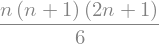

In [5]:
#   SUMMATION
smp.Sum('k**2', ('k', 1, n)).doit().factor()

In [6]:
# LIMIT, INF
smp.limit(smp.ln(x)/x, x, smp.oo)

In [7]:
# !!!!!!
expr = n / smp.factorial(n)**(1/n)
smp.limit(expr, n , smp.oo)
#type(smp.oo)

In [8]:
# DERIVATIVE
smp.diff(smp.E**x**2)

In [9]:
# INTEGRAL, FACTOR
smp.integrate(smp.ln(x), x).factor()

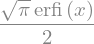

In [10]:
smp.integrate(smp.E**(x**2), x)

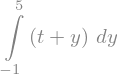

In [11]:
# UNEVALUATED INTEGRAL AS AN OBJECT
smp.Integral(y+t, (y, -1, 5))

In [12]:
#GAUSS INTEGRAL
smp.Integral(smp.E**-x**2, (x,-smp.oo, smp.oo)).doit()

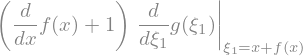

In [13]:
#FUNCTIONS, ABSTRACT DERIVATIVES
f, g = smp.symbols('f g', cls=smp.Function)
f = f(x)
g = g(f + x)
smp.diff(g)

SOLVE ALGEBRAIC, DEs.  RETURNS Eq OBJECT WITH lhs AND rhs

In [14]:
#smp.solve(x**2 + 4, x)
equality_object = smp.dsolve(smp.Eq(f.diff(x, x, x, x), f), f)
equality_object.rhs.subs({x:1, 'C1':1}) # create symbols on the fly from strings

SERIES EXPANSION AND EVALUATION, PLOTTING

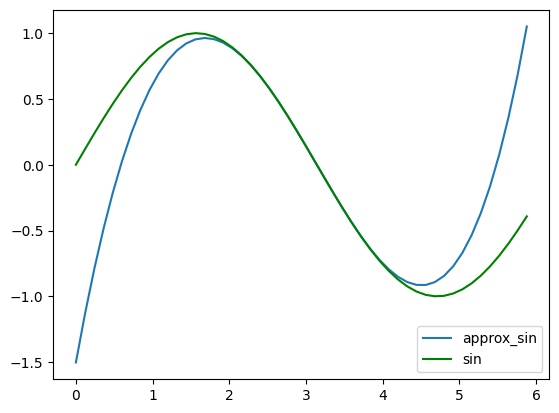

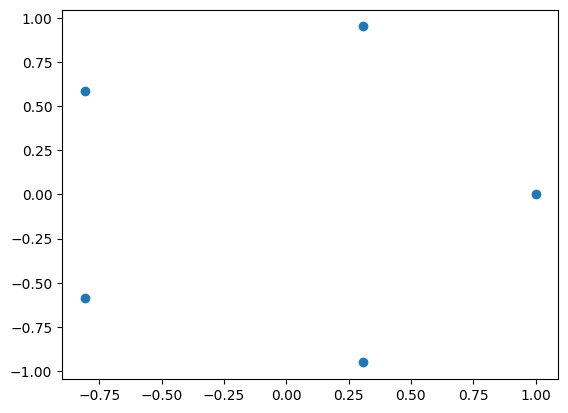

In [15]:
#smp.pretty_print(smp.sin(x).series(x, x0 = 3, n=10).evalf(3).removeO())

#smp.sin(x).series(x, x0=3, n=10).removeO().expand().evalf()

approx_sin = smp.sin(x).series(x, x0=3, n=5).removeO().expand().collect(x)


import matplotlib.pyplot as plt

# plot approx_sin
a, b = 0, 6
N = 50
x_partition = [a + i*(b-a)/N for i in range(N)]
plt.plot(x_partition, [approx_sin.subs({x:t}).evalf(3) for t in x_partition], label='approx_sin')
plt.plot(x_partition, [smp.sin(x).subs({x:t}).evalf(3) for t in x_partition], label='sin', color='g')
plt.legend(loc='best')
plt.show()

roots_unity5 = smp.solve(x**5 - 1, x)
real_im_list = [(smp.re(z), smp.im(z)) for z in roots_unity5]
real_im_list
plt.scatter([inner[0] for inner in real_im_list[0:]], [inner[1] for inner in real_im_list[0:]])


<h1>LINEAR EQUATIONS, MATRICES</h1>

<b>Method 1</b>: <b>INVERSION</b>

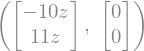

In [16]:
A = smp.Matrix([[1,2], [4,5]])
z = smp.symbols('z')
b = smp.Matrix([12*z, 15*z])

x = A.inv()*b
x, A*x - b

<b>Method 2</b>: <b>Augmented system, solve_linear_system</b><br>
Provide output variables

In [17]:
A_b = smp.Matrix([[A, b]])
A_b
A_b.subs({z:1})

sol = smp.solve_linear_system(A_b,smp.Symbol('x1'),smp.Symbol('x2'))
for s in sol:
    print(sol[s].subs({z:1}), end='  ')

-10  11  

<b>Method 3</b>: <b>Solve</b><br>

In [18]:
x = smp.Symbol('x')
smp.solve([1*x + 2*y - 12*z, 4*x + 5*y - 15*z], x, y)

<h1>Non-linear equations</h1>

\left[ \left\{ x : - \frac{\sqrt{2}}{2}, \  y : - \frac{\sqrt{2}}{2}\right\}, \  \left\{ x : \frac{\sqrt{2}}{2}, \  y : \frac{\sqrt{2}}{2}\right\}\right]


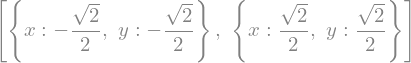

In [19]:
# LOGARITHM
sol = smp.solve([x-10-smp.ln(x)])
sol
[s[x].doit().evalf() for s in sol]

#CIRCLE
soln = smp.solve([x**2+y**2-1, x-y])

#LATEX CODE GENERATION
print(smp.latex(soln))
soln

<h1>C code generation</h1>

In [20]:
from sympy.utilities.codegen import codegen
x = smp.Symbol('x')                                                                                                          
smp.sin(x).series(x, 0, 6)

print(codegen(("taylor_sine",smp.sin(x).series(x,0,6)), language='C')[0][1])

/******************************************************************************
 *                      Code generated with SymPy 1.12.1                      *
 *                                                                            *
 *              See http://www.sympy.org/ for more information.               *
 *                                                                            *
 *                       This file is part of 'project'                       *
 ******************************************************************************/
#include "taylor_sine.h"
#include <math.h>

double taylor_sine(double x) {

   double taylor_sine_result;
   taylor_sine_result = x - 1.0/6.0*pow(x, 3) + (1.0/120.0)*pow(x, 5) + O(x**6);
   return taylor_sine_result;

}

